In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
XTest = pd.read_csv("Diabetes_Xtest.csv")
XTrain = pd.read_csv("Diabetes_XTrain.csv")
YTrain = pd.read_csv("Diabetes_YTrain.csv")

In [132]:
XTrain.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [133]:
XTrain.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.758681,119.975694,68.826389,20.364583,76.166667,31.857292,0.481519,32.954861
std,3.328783,31.512914,20.285812,15.893856,109.193550,8.134926,0.336910,11.878137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.975000,0.247750,24.000000
50%,3.000000,116.000000,72.000000,22.000000,36.000000,32.000000,0.381500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,120.000000,36.725000,0.641250,40.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000


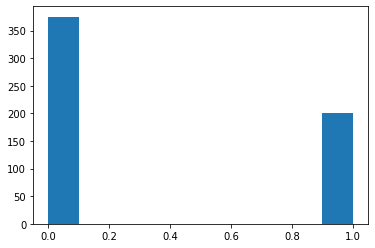

In [134]:
plt.hist(Ytrain)
plt.show()

In [135]:
YTrain.value_counts()

Outcome
0          375
1          201
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

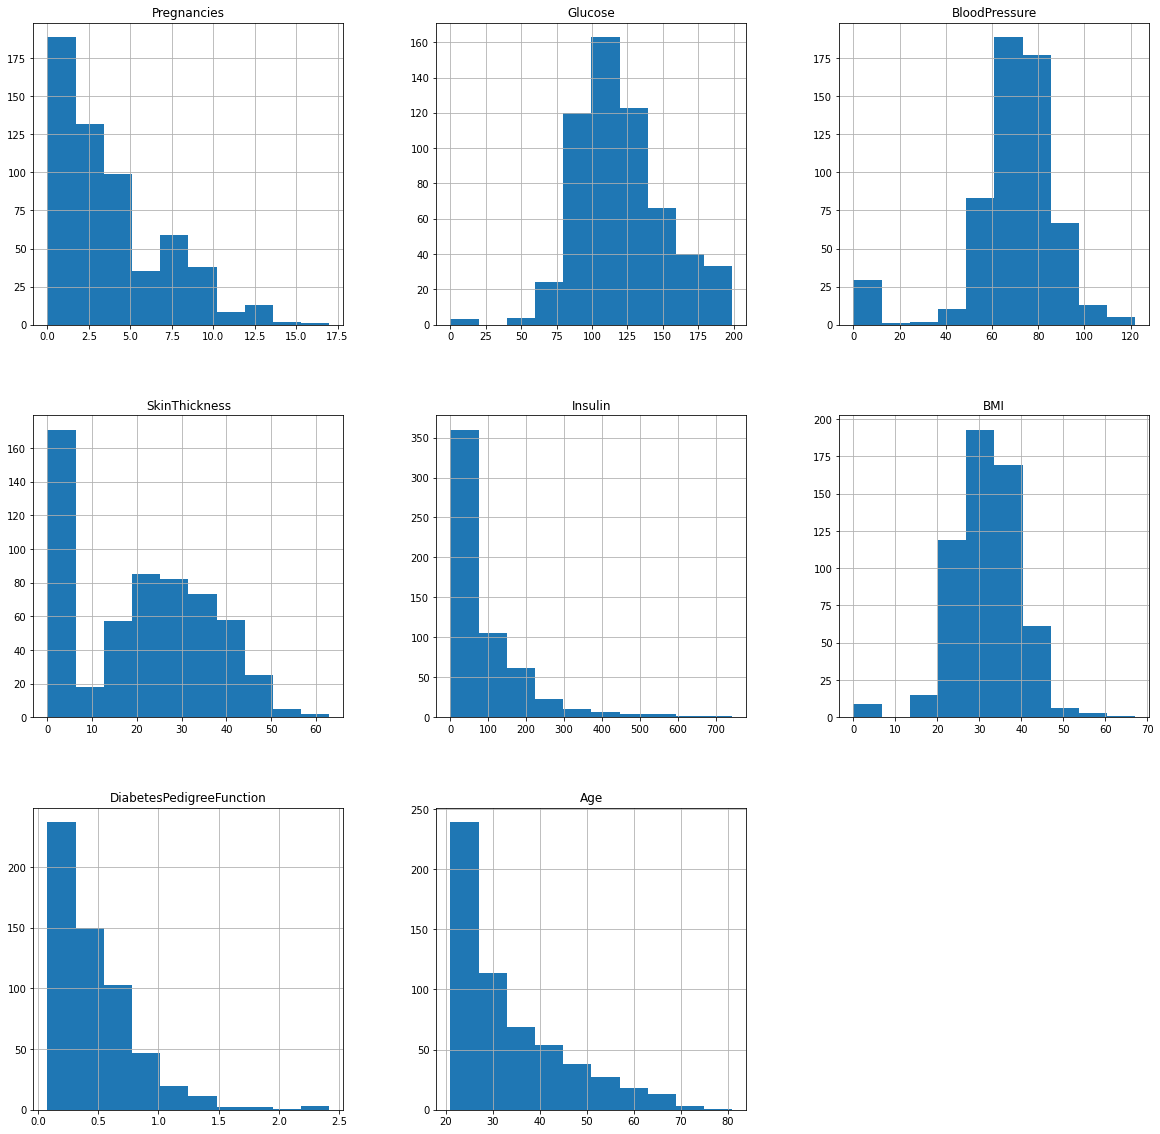

In [136]:
XTrain.hist(figsize = (20,20))

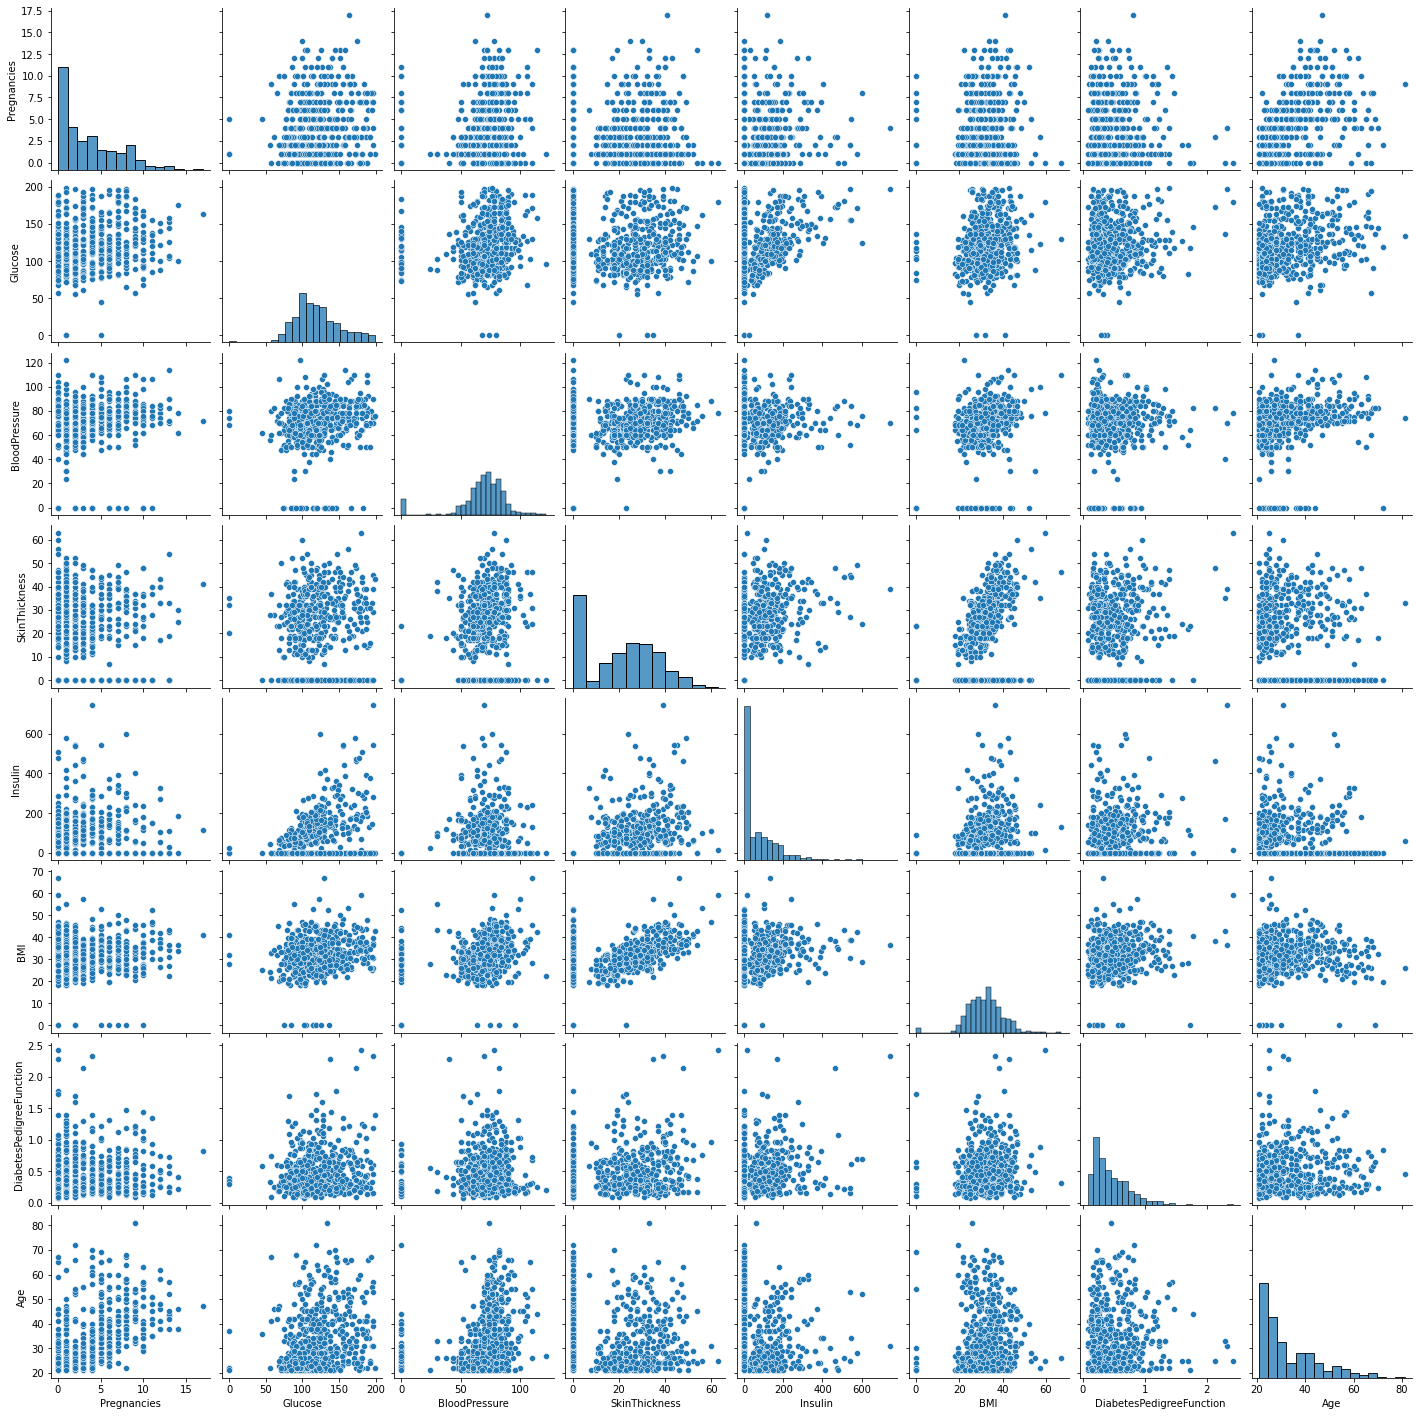

In [137]:
sns.pairplot(XTrain)

In [138]:
XTrain['Outcome'] = Ytrain

In [139]:
XTrain.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,168,88,42,321,38.2,0.787,40,1
1,8,110,76,0,0,27.8,0.237,58,0
2,7,147,76,0,0,39.4,0.257,43,1
3,2,100,66,20,90,32.9,0.867,28,1
4,4,129,86,20,270,35.1,0.231,23,0


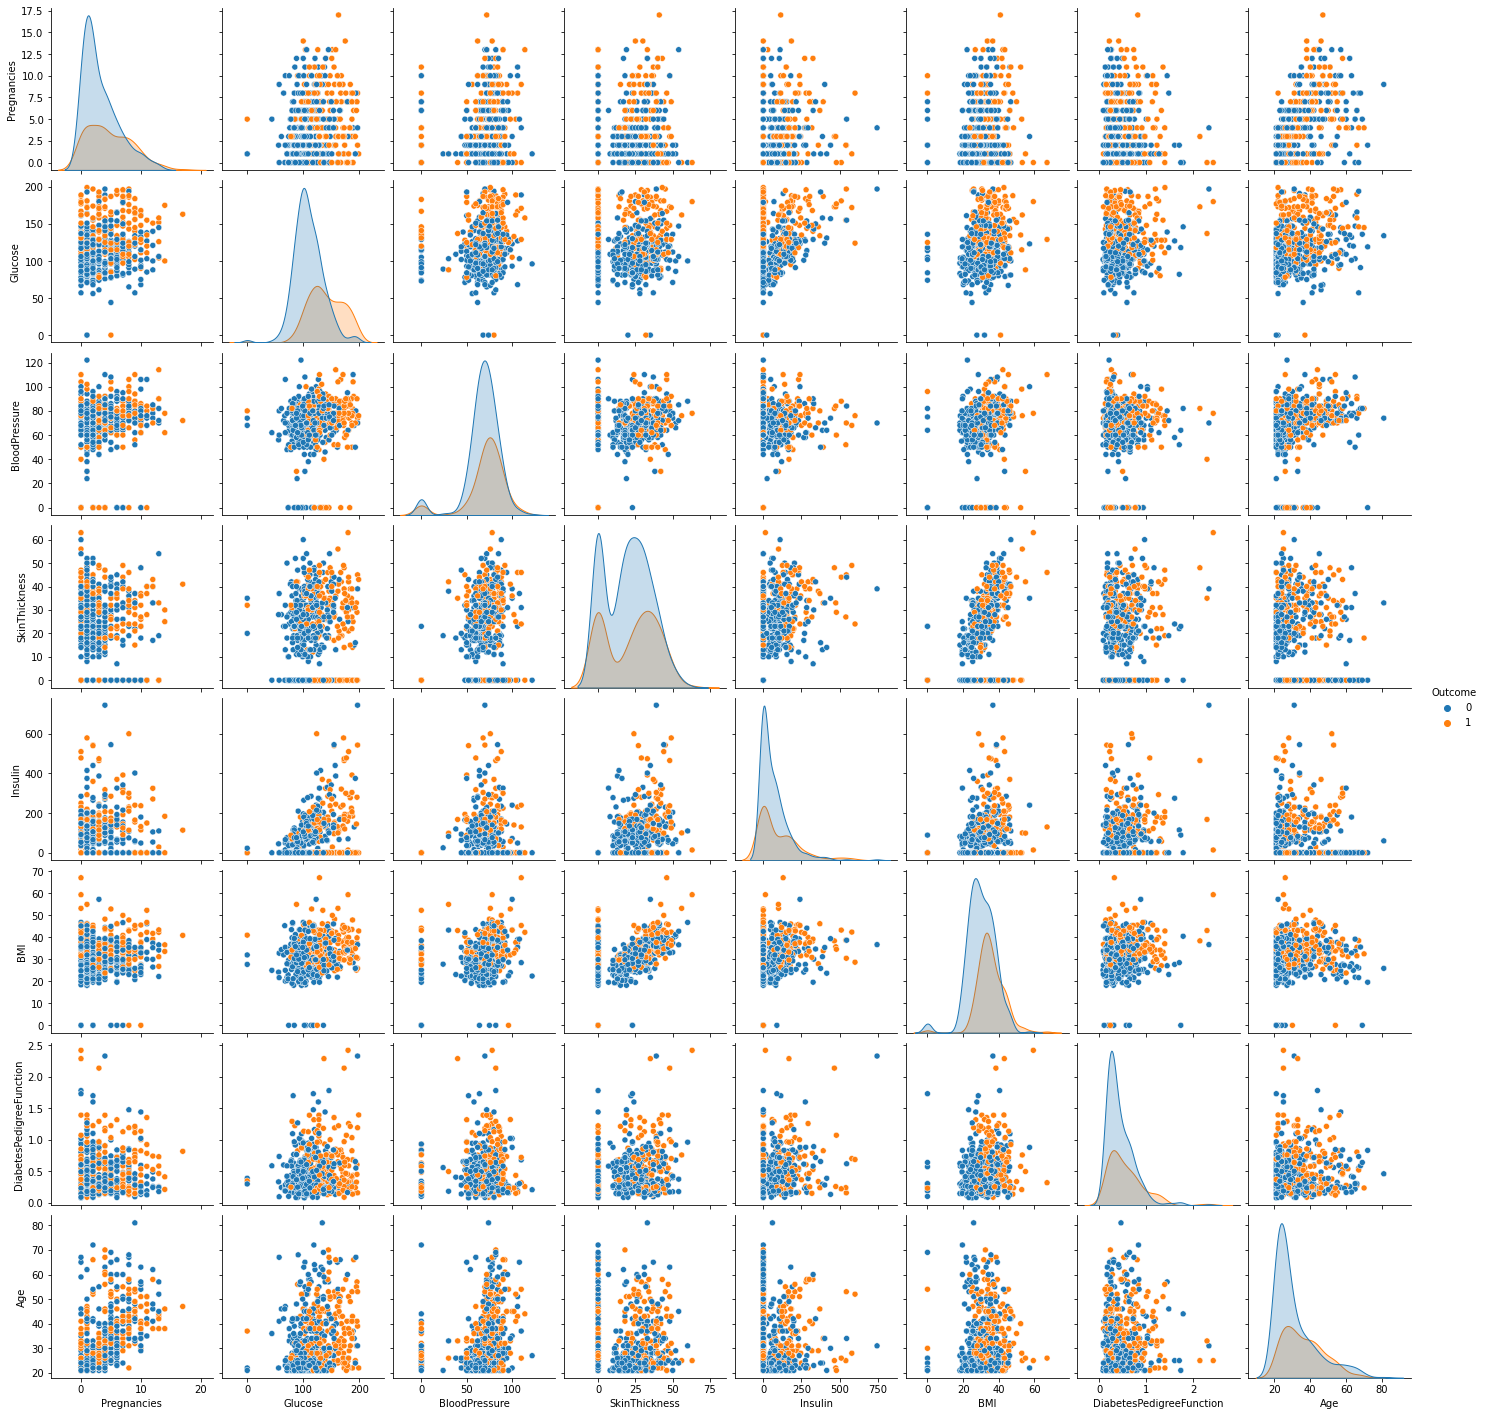

In [140]:
sns.pairplot(XTrain,hue = "Outcome")

<AxesSubplot:>

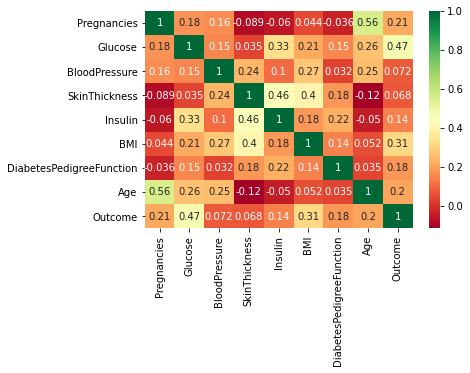

In [141]:
sns.heatmap(XTrain.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap


In [142]:
XTrain = XTrain.drop(['Outcome'],axis = 1)
#df.drop(['B', 'C'], axis=1)

In [143]:
#Converting DataFrames to ndarrays
train = XTrain.values
ytrain = YTrain.values
test = XTest.values

In [144]:
train.shape
ytrain = ytrain.reshape((-1))

In [145]:
#Applying KNN
def distance(x,y):
    return np.sqrt(sum((x-y)**2))

In [146]:
def knn(x,y,querry_point,k = 5):
    vals = []
    m = x.shape[0]
    for i in range(m):
        dis = distance(x[i],querry_point)
        vals.append((dis,y[i]))
    
        
    vals = sorted(vals)
    #pick k nearest neighbours
    vals = vals[:k]
    vals = np.array(vals)
    new_values = np.unique(vals[:,1],return_counts = True)
    #print(new_values)
    index = new_values[1].argmax()
    return new_values[0][index]

In [147]:
knn(train,ytrain,test[0])

1.0

In [148]:
test.shape

(192, 8)

In [160]:
outcome = np.zeros(test.shape[0])
for i in range(test.shape[0]):
    outcome[i] = knn(train,ytrain,test[i])

In [161]:
print(outcome)

[1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.]


In [162]:
dic = {
    "Outcome":outcome
}

In [163]:
df = pd.DataFrame(dic)

In [164]:
df.to_csv("Ytest.csv")

In [165]:
XTest["Outcome"] =outcome

In [166]:
XTest.to_csv("Diabeties_test.csv")